In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Upload datasets

df_201* is the solar irradiance data

farm_201* refers to real solar farm data

## How to handle missing data

1. Upload the solar farm datasets
2. Resample by hourly mean

Doing this will create space for the missing time by filling with NaNs. 

3. Upload the solar irradiance datasets
4. Calculate power based on the solar irradiance for each year. 

Now we can combine the datasets such that where the solar farm dataset has NaN values, it will be replaced by a calculated value from the irradiance dataset. 

In [2]:
# define path to data
path = "../../data/" 

In [3]:
# solar irradiation data
df_2016 = pd.read_csv(path+"2016_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2016['time'] = pd.to_datetime(df_2016[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2016.index = pd.to_datetime(df_2016.time)

df_2017 = pd.read_csv(path+"2017_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2017['time'] = pd.to_datetime(df_2017[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2017.index = pd.to_datetime(df_2017.time)

df_2018 = pd.read_csv(path+"2018_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2018['time'] = pd.to_datetime(df_2018[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2018.index = pd.to_datetime(df_2018.time)

In [4]:
# data from the solar farm
farm_2016 = pd.read_csv(path+'solardata_2016.csv', parse_dates=True, index_col='time')
farm_2016 = farm_2016.resample('H').mean()[:8760]

farm_2017 = pd.read_csv(path+'solardata_2017.csv', parse_dates=True, index_col='time')
farm_2017 = farm_2017.resample('H').mean()

farm_2018 = pd.read_csv(path+'solardata_2018.csv', parse_dates=True, index_col='time')
farm_2018 = farm_2018.resample('H').mean()

In [24]:
len(farm_2016)

8760

In [26]:
all_data = pd.read_csv(path+"solardata.csv", parse_dates=True, index_col='time')

In [29]:
all_hourly = all_data.resample('H').mean()

In [30]:
yearly_group = all_hourly.groupby(all_hourly.index.year)

farm_2016_hourly = yearly_group.get_group(2016)[:8760]
farm_2017_hourly = yearly_group.get_group(2017)
farm_2018_hourly = yearly_group.get_group(2018)

In [33]:
farm_2018_hourly

,measured,inverted
time,,
2018-01-01 00:00:00,NaN,NaN
2018-01-01 01:00:00,NaN,NaN
2018-01-01 02:00:00,NaN,NaN
2018-01-01 03:00:00,NaN,NaN
2018-01-01 04:00:00,NaN,NaN
2018-01-01 05:00:00,NaN,NaN
2018-01-01 06:00:00,NaN,NaN
2018-01-01 07:00:00,NaN,NaN
2018-01-01 08:00:00,NaN,NaN


In [5]:
# time converters from datetime to minutes
year_minutes = lambda x: (x.year-2013)*525600 + (x.month-1)*43800  + (x.day-1)*1440 + (x.hour)*60 + x.minute
month_minutes = lambda x: (x.day-1)*1440 + (x.hour)*60 + x.minute
year_hours = lambda x: (x.year-2013)*8760 + (x.month-1)*730 + (x.day-1)*24 + (x.hour)

In [7]:
df_2016_hourly = df_2016.resample('H').mean()[:8760]
df_2017_hourly = df_2017.resample('H').mean()
df_2018_hourly = df_2018.resample('H').mean()

## Step 2: Define and calculate the declination for each day

The formula for declination is

$\delta = 23.44*\sin(\frac{\pi}{180}\frac{360}{365}(N+284))$

The factor of $\pi/180$ in the sine argument is necessary because numpy 
defaults to radians, rather than degrees.

In [8]:
# define the calculation for declination (delta). 
delta = lambda x: 23.44*np.sin(np.pi/180*(360/365)*(x+284))

In [9]:
# the deltas are still not quite correct, so I'm going to force it to be correct. 
# This will not be the prettiest of solutions. 
dec = {'delta':[]}

for day in range(1,366):
  hourly_dec = []
  for hour in range(24):
    hourly_dec.append(delta(day))
  # print(len(hourly_dec))
  dec['delta'].extend(hourly_dec)

dec = pd.Series(dec)
print(len(dec['delta']))

8760


In [11]:
df_2016_hourly['delta'] = dec['delta']
df_2017_hourly['delta'] = dec['delta']
df_2018_hourly['delta'] = dec['delta']

In [12]:
df_2016_hourly

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta
time,,,,,,,,,
2016-01-01 00:00:00,2016.0,1.0,1.0,0.0,15.0,0.0,0.0,-6.5,-23.001824
2016-01-01 01:00:00,2016.0,1.0,1.0,1.0,15.0,0.0,0.0,-6.0,-23.001824
2016-01-01 02:00:00,2016.0,1.0,1.0,2.0,15.0,0.0,0.0,-6.0,-23.001824
2016-01-01 03:00:00,2016.0,1.0,1.0,3.0,15.0,0.0,0.0,-7.0,-23.001824
2016-01-01 04:00:00,2016.0,1.0,1.0,4.0,15.0,0.0,0.0,-8.0,-23.001824
2016-01-01 05:00:00,2016.0,1.0,1.0,5.0,15.0,0.0,0.0,-8.0,-23.001824
2016-01-01 06:00:00,2016.0,1.0,1.0,6.0,15.0,0.0,0.0,-7.5,-23.001824
2016-01-01 07:00:00,2016.0,1.0,1.0,7.0,15.0,3.0,0.0,-6.5,-23.001824
2016-01-01 08:00:00,2016.0,1.0,1.0,8.0,15.0,41.5,0.0,-4.5,-23.001824


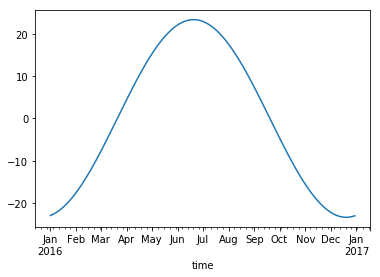

In [13]:
# verify that delta is correct
angle = df_2016_hourly['delta'].resample('D').mean()
angle.plot()

## Step 3: Calculate the hourly Total Irradiance ($G_T$) and Power (P)

This is the model for power output of a solar panel \
$P = G_T\tau_{pv}\eta_{ref}A[1-\gamma(T-25)]$

where $G_T$ is given by \
$G_T = DNI*\cos(\beta+\delta-lat)+DHI*\frac{180-\beta}{180}$

- $\tau$ is the "transmittance of the PV module's outside layer"
- $\gamma$ is the "temperature coefficient
- A is the area covered by the solar panels
- $\eta$ is the PV module efficiency
- $\beta$ is the tilt of the solar panels
- T is the temperature (in $^\circ$C)

These formulas were obtained from Garcia et. al. Which can be found at this link
https://inldigitallibrary.inl.gov/sites/sti/sti/6531825.pdf 

The values for $\gamma$, $\tau$ and $\eta$ are not known for the UIUC solar farm, thus values from Garcia et. al are also used. Later, we will normalize the data set and rescale it by the rated power to fix this problem. 

In [14]:
# approximate coordinates of champaign-urbana
lat = 40.13
lon = -88.22

# these values are from Garcia et. al
# Currently, the maximum power output is too high. 
eta = 0.15
tau = 0.9
gam = 0.0045 # changed this from 0.0045 to 0.009 to see if I get a more accurate max value.

# these values are from the iSEE facts sheet regarding UIUC's solar farm
beta = 20
A = 84174.61*0.6 # [m^2] or 20.8 acres, but a coverage factor of 60%

# define the formulae
G = lambda dni, delt, dhi: dni*np.cos((np.pi/180)*(beta + delt - lat)) + dhi*(180-beta)/180
P = lambda Gt, T: Gt*tau*eta*A*(1-gam*(T-25))

In [15]:
sol_irr = {'G':[]}
for i in range(len(df_2016_hourly)):
  dni = df_2016_hourly.iloc[i]['DNI']
  dhi = df_2016_hourly.iloc[i]['DHI']
  delt = df_2016_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2016_hourly['G'] = sol_irr['G']

power = {'Power':[]}
for i in range(len(df_2016_hourly)):
  gt = df_2016_hourly.iloc[i]['G']
  T = df_2016_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2016_hourly['power'] = power['Power']

In [16]:
sol_irr = {'G':[]}
for i in range(len(df_2017_hourly)):
  dni = df_2017_hourly.iloc[i]['DNI']
  dhi = df_2017_hourly.iloc[i]['DHI']
  delt = df_2017_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2017_hourly['G'] = sol_irr['G']

power = {'Power':[]}
for i in range(len(df_2017_hourly)):
  gt = df_2017_hourly.iloc[i]['G']
  T = df_2017_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2017_hourly['power'] = power['Power']

In [17]:
sol_irr = {'G':[]}
for i in range(len(df_2018_hourly)):
  dni = df_2018_hourly.iloc[i]['DNI']
  dhi = df_2018_hourly.iloc[i]['DHI']
  delt = df_2018_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2018_hourly['G'] = sol_irr['G']

power = {'Power':[]}
for i in range(len(df_2018_hourly)):
  gt = df_2018_hourly.iloc[i]['G']
  T = df_2018_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2018_hourly['power'] = power['Power']

In [18]:
# import required libraries to normalize
from sklearn import preprocessing

def normalize(df, col):
  """
  This function accepts a dataframe and a column label
  and returns a normalized version of the column as a 
  pandas series.

  Parameters:
  -----------
  df : Pandas dataframe
    The dataframe containing the column you'd like to normalize.
  col : string
    The label of the column you wish to normalize

  Returns: 
  --------
  normalized_col : Pandas series
    The normalized column of data.
  """
  column = df[[col]].values.astype(float)
  min_max_scaler = preprocessing.MinMaxScaler()
  column_scaled = min_max_scaler.fit_transform(column)
  
  normalized_col = pd.Series({col+'_norm':column_scaled})

  return normalized_col

In [57]:
rated_power = 4.8*1000 # [MWe]
norm_2016 = normalize(df_2016_hourly, 'power')
df_2016_hourly['power_norm'] = norm_2016['power_norm']*rated_power

norm_2017 = normalize(df_2017_hourly, 'power')
df_2017_hourly['power_norm'] = norm_2017['power_norm']*rated_power

norm_2018 = normalize(df_2018_hourly, 'power')
df_2018_hourly['power_norm'] = norm_2018['power_norm']*rated_power

In [58]:
df_2018_hourly.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta,G,power,power_norm,power_data
time,,,,,,,,,,,,,
2018-01-01 00:00:00,2018.0,1.0,1.0,0.0,15.0,0.0,0.0,-21.10,-23.001824,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,2018.0,1.0,1.0,1.0,15.0,0.0,0.0,-21.80,-23.001824,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,2018.0,1.0,1.0,2.0,15.0,0.0,0.0,-22.50,-23.001824,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,2018.0,1.0,1.0,3.0,15.0,0.0,0.0,-23.15,-23.001824,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,2018.0,1.0,1.0,4.0,15.0,0.0,0.0,-23.75,-23.001824,0.0,0.0,0.0,0.0


In [59]:
farm_2018_hourly.head()

,measured,inverted
time,,
2018-01-01 00:00:00,NaN,NaN
2018-01-01 01:00:00,NaN,NaN
2018-01-01 02:00:00,NaN,NaN
2018-01-01 03:00:00,NaN,NaN
2018-01-01 04:00:00,NaN,NaN


In [60]:
df_2016_hourly['power_data'] = farm_2016_hourly['inverted']
df_2017_hourly['power_data'] = farm_2017_hourly['inverted']
df_2018_hourly['power_data'] = farm_2018_hourly['inverted']

df_2018_hourly.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta,G,power,power_norm,power_data
time,,,,,,,,,,,,,
2018-01-01 00:00:00,2018.0,1.0,1.0,0.0,15.0,0.0,0.0,-21.10,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 01:00:00,2018.0,1.0,1.0,1.0,15.0,0.0,0.0,-21.80,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 02:00:00,2018.0,1.0,1.0,2.0,15.0,0.0,0.0,-22.50,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 03:00:00,2018.0,1.0,1.0,3.0,15.0,0.0,0.0,-23.15,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 04:00:00,2018.0,1.0,1.0,4.0,15.0,0.0,0.0,-23.75,-23.001824,0.0,0.0,0.0,NaN


In [61]:
df_2018_hourly.power_data.fillna(df_2018_hourly.power_norm, inplace=True)

In [62]:
# toMW = lambda x: x/1000
# df_2018_hourly.power_data.apply(toMW)

df_2018_hourly

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta,G,power,power_norm,power_data
time,,,,,,,,,,,,,
2018-01-01 00:00:00,2018.0,1.0,1.0,0.0,15.0,0.0,0.0,-21.10,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 01:00:00,2018.0,1.0,1.0,1.0,15.0,0.0,0.0,-21.80,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 02:00:00,2018.0,1.0,1.0,2.0,15.0,0.0,0.0,-22.50,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 03:00:00,2018.0,1.0,1.0,3.0,15.0,0.0,0.0,-23.15,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 04:00:00,2018.0,1.0,1.0,4.0,15.0,0.0,0.0,-23.75,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 05:00:00,2018.0,1.0,1.0,5.0,15.0,0.0,0.0,-24.20,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 06:00:00,2018.0,1.0,1.0,6.0,15.0,0.0,0.0,-24.45,-23.001824,0.000000,0.000000e+00,0.000000,0.000000
2018-01-01 07:00:00,2018.0,1.0,1.0,7.0,15.0,7.0,63.0,-24.00,-23.001824,52.198529,4.343724e+05,264.372188,264.372188
2018-01-01 08:00:00,2018.0,1.0,1.0,8.0,15.0,48.0,309.0,-22.00,-23.001824,268.169507,2.215129e+06,1348.194418,1348.194418


4799.999999999999
4731.0


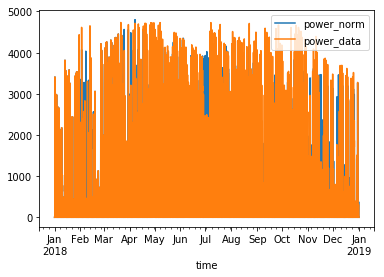

In [65]:
final_2018 = df_2018_hourly[['power_norm','power_data']]
print(final_2018.power_norm.max())
print(final_2018.power_data.max())
final_2018.plot()